**Instalar Librerias**

In [1]:
!pip install streamlit
!pip install pyngrok
!pip install yfinance
!pip install matplotlib
!npm install -g localtunnel
!pip install talib
!pip uninstall talib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0

added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


**importar Bases de datos de Yahoo Financial**

In [2]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta

# Título de la aplicación
st.title('Visualización de Acciones del S&P 500')

# Descripción
st.write('Esta aplicación te permite visualizar los datos históricos de las principales acciones del S&P 500.')

# Lista de símbolos del S&P 500
sp500_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'JPM', 'JNJ', 'V', 'NVDA']

# Crear un selector en Streamlit para elegir una acción del S&P 500
selected_symbol = st.selectbox('Selecciona una acción del S&P 500', sp500_symbols)

# Selección de rango de fechas
start_date = st.date_input('Fecha de inicio', value=pd.to_datetime('2010-01-01'))
end_date = st.date_input('Fecha de fin', value=pd.to_datetime('today'))

# Botón para cargar datos y visualizar
if st.button('Mostrar gráfico'):
    # Descargar datos de Yahoo Finance
    data = yf.download(selected_symbol, start=start_date, end=end_date)

    if not data.empty:
        # Mostrar gráfico del precio de cierre
        st.subheader(f'Datos históricos de {selected_symbol}')
        st.line_chart(data['Close'])

        # Mostrar tabla de datos
        st.subheader('Datos en tabla')
        st.dataframe(data)
    else:
        st.error('No se encontraron datos para este rango de fechas.')


Writing app.py


**Codigo para Correr codigo desde Google Colab:**

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

sp500_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'JPM', 'JNJ', 'V', 'NVDA']

# Crear un DataFrame vacío para almacenar los datos
df = pd.DataFrame()

# Descargar los datos históricos para cada acción
for symbol in sp500_symbols:
    data = yf.download(symbol, start='2020-01-01', end='2024-08-29')
    data['Symbol'] = symbol
    df = pd.concat([df, data])

# Reordenar las columnas para que Symbol sea la primera
df = df[['Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Guardar el DataFrame en un archivo CSV
df.to_csv('sp500_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-3-314e556c3c60>:14: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat([df, data])
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 comp

In [4]:
df.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,AAPL,74.059998,75.150002,73.797501,75.087502,72.876114,135480400.0
2020-01-03,AAPL,74.287498,75.144997,74.125000,74.357498,72.167618,146322800.0
2020-01-06,AAPL,73.447502,74.989998,73.187500,74.949997,72.742653,118387200.0
2020-01-07,AAPL,74.959999,75.224998,74.370003,74.597504,72.400543,108872000.0
2020-01-08,AAPL,74.290001,76.110001,74.290001,75.797501,73.565208,132079200.0


In [5]:
# Convertir el índice Date a un tipo de dato de fecha y hora
df.index = pd.to_datetime(df.index)

# Extraer el día, mes y año de la fecha
df['Dia'] = df.index.day
df['Mes'] = df.index.month
df['Año'] = df.index.year

# Reordenar las columnas
df = df.reset_index(drop=True)[['Symbol', 'Año', 'Mes', 'Dia', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [6]:
df.head()

,Symbol,Año,Mes,Dia,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2020,1,2,74.059998,75.150002,73.797501,75.087502,72.876114,135480400.0
1,AAPL,2020,1,3,74.287498,75.144997,74.125000,74.357498,72.167618,146322800.0
2,AAPL,2020,1,6,73.447502,74.989998,73.187500,74.949997,72.742653,118387200.0
3,AAPL,2020,1,7,74.959999,75.224998,74.370003,74.597504,72.400543,108872000.0
4,AAPL,2020,1,8,74.290001,76.110001,74.290001,75.797501,73.565208,132079200.0


In [7]:
df = df.rename(columns={
    'Symbol': 'Empresa',
    'Año': 'Año',
    'Mes': 'Mes',
    'Dia': 'Día',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [ ]:
df.head()

,Empresa,Año,Mes,Día,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
0,AAPL,2020,1,2,74.059998,75.150002,73.797501,75.087502,72.876114,135480400.0
1,AAPL,2020,1,3,74.287498,75.144997,74.125000,74.357498,72.167603,146322800.0
2,AAPL,2020,1,6,73.447502,74.989998,73.187500,74.949997,72.742668,118387200.0
3,AAPL,2020,1,7,74.959999,75.224998,74.370003,74.597504,72.400536,108872000.0
4,AAPL,2020,1,8,74.290001,76.110001,74.290001,75.797501,73.565201,132079200.0


In [8]:
# Agregar columna de rendimiento diario
df['Rendimiento Diario'] = (df['Cierre'] - df['Apertura']) / df['Apertura']

# Agregar columna de volatilidad
df['Volatilidad'] = df['Rendimiento Diario'].rolling(window=20).std()

# Agregar columna de tendencia
df['Tendencia'] = df['Rendimiento Diario'].rolling(window=50).mean()

# Agregar columna de sobrecompra/sobrevendido
df['Sobrecompra/Sobrevendido'] = (df['Cierre'] - df['Cierre'].rolling(window=200).mean()) / df['Cierre'].rolling(window=200).mean()

# Agregar columna de recomendación
df['Recomendación'] = np.where((df['Tendencia'] > 0) & (df['Volatilidad'] < 0.05) & (df['Sobrecompra/Sobrevendido'] < 0.5), 'Comprar', np.where((df['Tendencia'] < 0) & (df['Volatilidad'] > 0.05) & (df['Sobrecompra/Sobrevendido'] > 0.5), 'Vender', 'Mantener'))

# Filtrar acciones con recomendación de comprar
df_comprar = df[df['Recomendación'] == 'Comprar']

# Ordenar acciones por rendimiento esperado
df_comprar = df_comprar.sort_values(by='Rendimiento Diario', ascending=False)

# Mostrar el resultado
print(df_comprar)

      Empresa   Año  Mes  Día    Apertura      Máximo      Mínimo      Cierre  \
4709     TSLA  2020    2    3   44.912666   52.409332   44.901333   52.000000   
9415     NVDA  2020    2   28    6.061500    6.811500    6.044750    6.751750   
4819     TSLA  2020    7   10   93.066666  103.261330   91.734001  102.976669   
4845     TSLA  2020    8   17  111.800003  123.057335  111.522003  122.375999   
5473     TSLA  2023    2   14  191.940002  209.820007  189.440002  209.250000   
...       ...   ...  ...  ...         ...         ...         ...         ...   
10044    NVDA  2022    8   26   17.857000   17.924000   16.237000   16.260000   
4820     TSLA  2020    7   13  110.599998  119.666000   98.073997   99.804001   
4711     TSLA  2020    2    5   54.883999   56.398666   46.940666   48.980000   
5271     TSLA  2022    4   26  331.809998  333.333344  291.666656  292.140015   
5156     TSLA  2021   11    9  391.200012  391.500000  337.173340  341.166656   

       Cierre Ajustado     

In [9]:
df_comprar.head()

,Empresa,Año,Mes,Día,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen,Rendimiento Diario,Volatilidad,Tendencia,Sobrecompra/Sobrevendido,Recomendación
4709,TSLA,2020,2,3,44.912666,52.409332,44.901333,52.000000,52.000000,7.059750e+08,0.157803,0.040026,0.006676,-0.675028,Comprar
9415,NVDA,2020,2,28,6.061500,6.811500,6.044750,6.751750,6.728623,1.133252e+09,0.113874,0.034589,0.004610,-0.969253,Comprar
4819,TSLA,2020,7,10,93.066666,103.261330,91.734001,102.976669,102.976669,3.500640e+08,0.106483,0.043632,0.004584,0.082002,Comprar
4845,TSLA,2020,8,17,111.800003,123.057335,111.522003,122.375999,122.375999,3.036345e+08,0.094597,0.042901,0.004079,0.450565,Comprar
5473,TSLA,2023,2,14,191.940002,209.820007,189.440002,209.250000,209.250000,2.164557e+08,0.090184,0.040693,0.001976,-0.070226,Comprar


In [10]:
#Filas y Columnas
df_comprar.shape

(5882, 15)

In [11]:
# Encontrar el día con el mayor volumen de ventas
max_volume_day = df[df['Volumen'] == df['Volumen'].max()]

# Mostrar el resultado
print(f"El día con el mayor volumen de ventas fue: {max_volume_day['Día'].values[0]}/{max_volume_day['Mes'].values[0]}/{max_volume_day['Año'].values[0]} para la empresa {max_volume_day['Empresa'].values[0]}")


El día con el mayor volumen de ventas fue: 25/5/2023 para la empresa NVDA


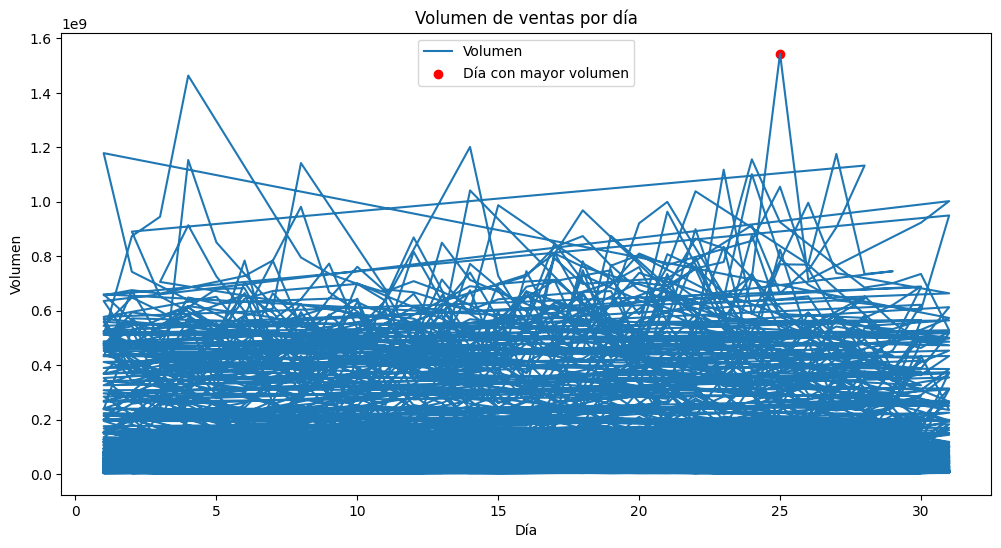

In [12]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Día'], df['Volumen'], label='Volumen')

# Destacar el día con el mayor volumen con un color diferente
plt.scatter(max_volume_day['Día'].values[0], max_volume_day['Volumen'].values[0], color='red', label='Día con mayor volumen')

# Agregar etiquetas y título
plt.xlabel('Día')
plt.ylabel('Volumen')
plt.title('Volumen de ventas por día')
plt.legend()

# Mostrar el gráfico
plt.show()


In [13]:
# Encontrar el día con el menor volumen de ventas
min_volume_day = df[df['Volumen'] == df['Volumen'].min()]

# Mostrar el resultado
print(f"El día con el menor volumen de ventas fue: {min_volume_day['Día'].values[0]}/{min_volume_day['Mes'].values[0]}/{min_volume_day['Año'].values[0]} para la empresa {min_volume_day['Empresa'].values[0]}")


El día con el menor volumen de ventas fue: 24/11/2023 para la empresa V


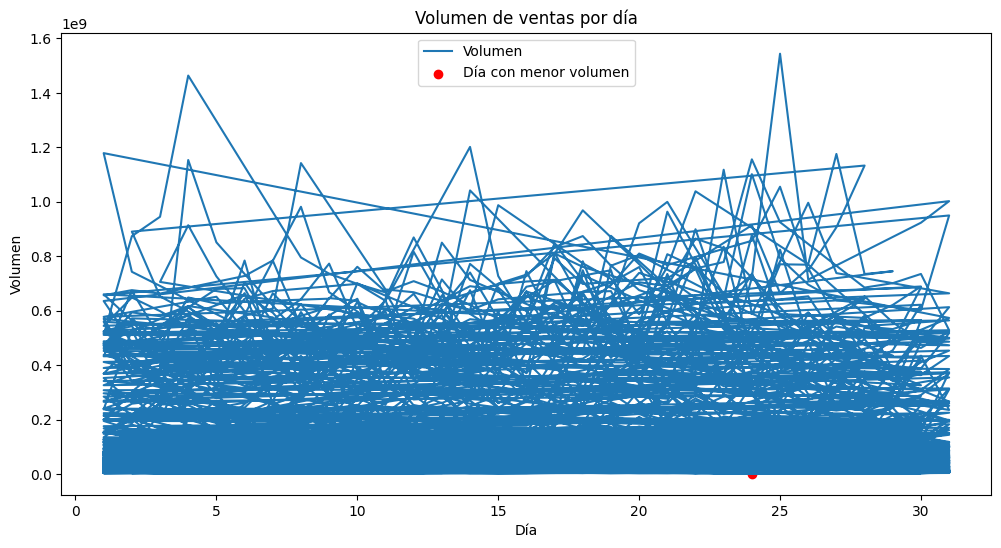

In [14]:
import matplotlib.pyplot as plt
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Día'], df['Volumen'], label='Volumen')

# Destacar el día con el menor volumen con un color diferente
plt.scatter(min_volume_day['Día'].values[0], min_volume_day['Volumen'].values[0], color='red', label='Día con menor volumen')

# Agregar etiquetas y título
plt.xlabel('Día')
plt.ylabel('Volumen')
plt.title('Volumen de ventas por día')
plt.legend()

# Mostrar el gráfico
plt.show()


In [15]:
# prompt: analisis  de rentabilidad con pandas de las empresas

# Calcular la rentabilidad anualizada para cada acción
df['Rentabilidad Anualizada'] = (df['Cierre'] / df['Apertura'] - 1) * 100

# Agrupar por empresa y calcular la rentabilidad promedio anualizada
rentabilidad_anualizada_por_empresa = df.groupby('Empresa')['Rentabilidad Anualizada'].mean()

# Mostrar la rentabilidad anualizada promedio para cada empresa
print(rentabilidad_anualizada_por_empresa)

# Ordenar las empresas por rentabilidad anualizada promedio
rentabilidad_anualizada_por_empresa_ordenada = rentabilidad_anualizada_por_empresa.sort_values(ascending=False)

# Mostrar el resultado
print(rentabilidad_anualizada_por_empresa_ordenada)


Empresa
AAPL     0.112343
AMZN     0.001047
GOOGL    0.092562
JNJ      0.015255
JPM      0.030018
MSFT     0.049563
NVDA     0.136935
TSLA     0.059355
V        0.024662
Name: Rentabilidad Anualizada, dtype: float64
Empresa
NVDA     0.136935
AAPL     0.112343
GOOGL    0.092562
TSLA     0.059355
MSFT     0.049563
JPM      0.030018
V        0.024662
JNJ      0.015255
AMZN     0.001047
Name: Rentabilidad Anualizada, dtype: float64


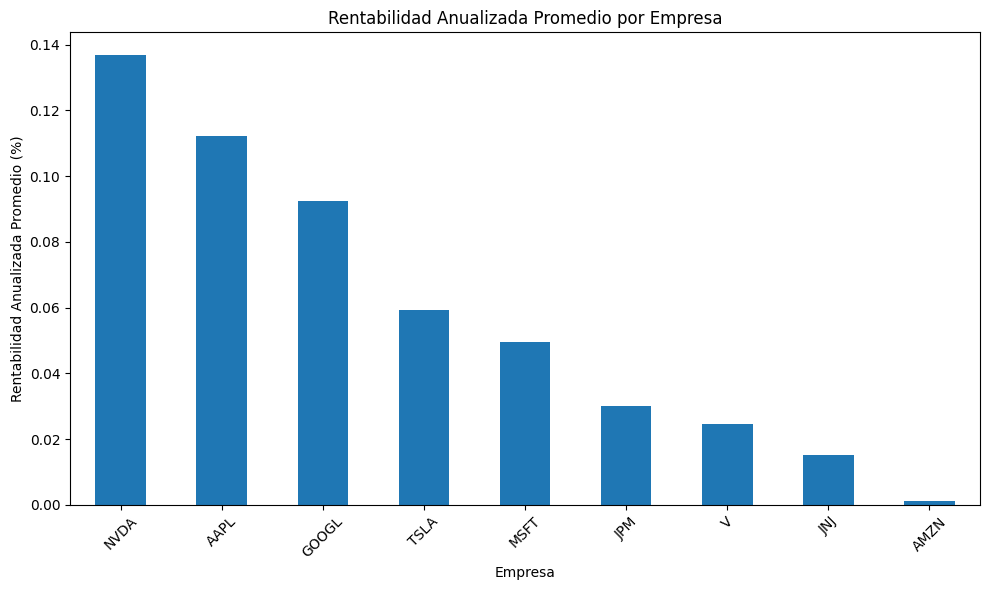

In [16]:
import matplotlib.pyplot as plt
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
rentabilidad_anualizada_por_empresa_ordenada.plot(kind='bar')
plt.xlabel('Empresa')
plt.ylabel('Rentabilidad Anualizada Promedio (%)')
plt.title('Rentabilidad Anualizada Promedio por Empresa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Empresa
TSLA     0.031592
NVDA     0.025654
AMZN     0.016706
AAPL     0.014876
GOOGL    0.014614
MSFT     0.014023
JPM      0.013157
V        0.012117
JNJ      0.009382
Name: Volatilidad, dtype: float64


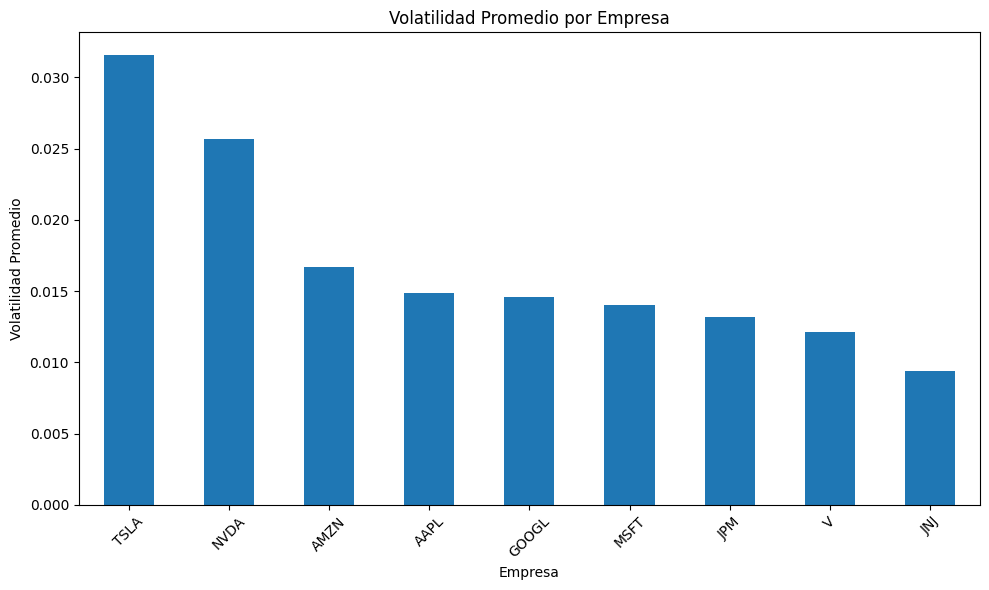

In [17]:
import matplotlib.pyplot as plt
# Agrupar por empresa y calcular la volatilidad promedio
volatilidad_por_empresa = df.groupby('Empresa')['Volatilidad'].mean()

# Ordenar las empresas por volatilidad promedio
volatilidad_por_empresa_ordenada = volatilidad_por_empresa.sort_values(ascending=False)

# Mostrar el resultado
print(volatilidad_por_empresa_ordenada)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
volatilidad_por_empresa_ordenada.plot(kind='bar')
plt.xlabel('Empresa')
plt.ylabel('Volatilidad Promedio')
plt.title('Volatilidad Promedio por Empresa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Empresa
NVDA     0.001373
AAPL     0.001044
GOOGL    0.000906
MSFT     0.000589
TSLA     0.000550
V        0.000291
JPM      0.000239
JNJ      0.000147
AMZN     0.000043
Name: Tendencia, dtype: float64


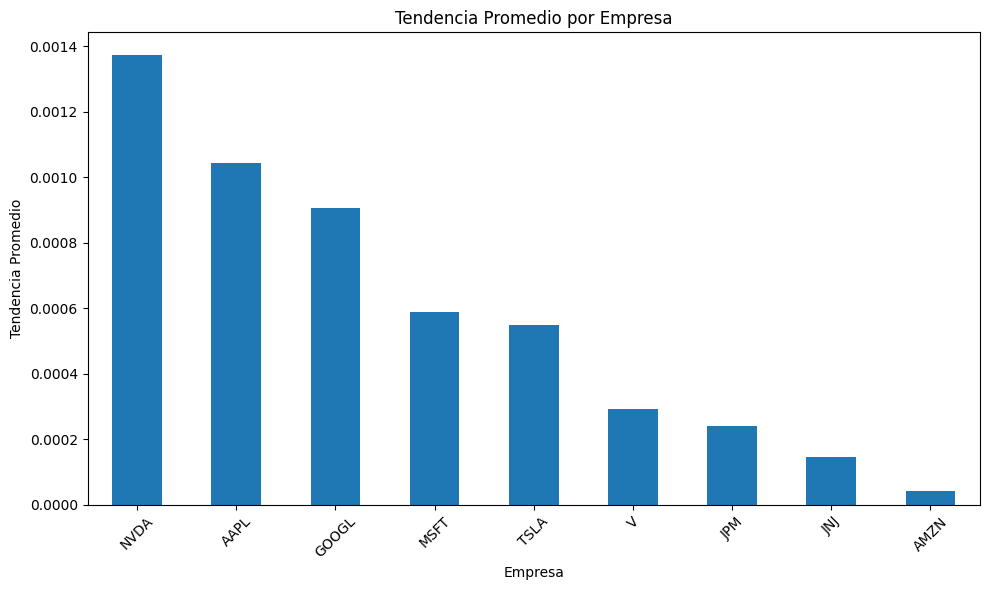

In [18]:
import matplotlib.pyplot as plt
# Agrupar por empresa y calcular la tendencia promedio
tendencia_por_empresa = df.groupby('Empresa')['Tendencia'].mean()

# Ordenar las empresas por tendencia promedio
tendencia_por_empresa_ordenada = tendencia_por_empresa.sort_values(ascending=False)

# Mostrar el resultado
print(tendencia_por_empresa_ordenada)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tendencia_por_empresa_ordenada.plot(kind='bar')
plt.xlabel('Empresa')
plt.ylabel('Tendencia Promedio')
plt.title('Tendencia Promedio por Empresa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**MACHINE LEARNING**